In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from statsmodels.tsa.arima_model import ARIMA

ts = pd.read_csv('dados/ts.csv')
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d')
ts = pd.read_csv('dados/ts.csv', parse_dates = ['mes'], index_col = 'mes', date_parser = dateparse)


In [1]:
!co

ModuleNotFoundError: No module named 'pyramid'

In [45]:
ts.head()

,Unnamed: 0,vendas,aumento,aceleracao
mes,,,,
2013-01-01,0,131479.0,NaN,NaN
2013-02-01,1,128090.0,-3389.0,NaN
2013-03-01,2,147142.0,19052.0,22441.0
2013-04-01,3,107190.0,-39952.0,-59004.0
2013-05-01,4,106970.0,-220.0,39732.0


In [46]:
ts.dtypes

Unnamed: 0      int64
vendas        float64
aumento       float64
aceleracao    float64
dtype: object

In [50]:
ts.drop('aceleracao' ,axis=1, inplace=True)

In [40]:
for linha in ts.index:
    ts.loc[linha, 'vendas'] = int(ts.loc[linha, 'vendas'])

In [64]:
ts.loc[:,

TypeError: '(slice(None, None, None), 0)' is an invalid key

In [69]:
ts_no_constants = ts.loc[:, (ts != ts.iloc[0]).any()]

In [77]:
ts_no_constants.dropna()
ori_data = (ts_no_constants - ts_no_constants.mean()) / ts_no_constants.std()
ori_data

,vendas
mes,
2013-01-01,0.849691
2013-02-01,0.730595
2013-03-01,1.400119
2013-04-01,-0.003872
2013-05-01,-0.011603
2013-06-01,0.635395
2013-07-01,0.339676
2013-08-01,0.632233
2013-09-01,0.914809


In [78]:
modelo = ARIMA(ori_data, order=(2,1,2))

C:\Users\samusilv\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\samusilv\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [79]:
modelo_train = modelo.fit()

In [80]:
modelo_train.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:               D.vendas   No. Observations:                   33
Model:                 ARIMA(2, 1, 2)   Log Likelihood                 -35.708
Method:                       css-mle   S.D. of innovations              0.671
Date:                Mon, 17 Feb 2020   AIC                             83.415
Time:                        15:16:34   BIC                             92.394
Sample:                    02-01-2013   HQIC                            86.436
                         - 10-01-2015                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.0727      0.114     -0.640      0.527      -0.295       0.150
ar.L1.D.vendas    -0.9175      0.086    -10.635      0.000      -1.087      -0.748
ar.L2.D.vendas    -0.9785      0.045    -21.877      0.000      -1.066      -0.891
ma.L1.D.vendas     0.8103      0.161      5.018      0.000       0.494       1.127
ma.L2.D.vendas     1.0000      0.153      6.516      0.000       0.699       1.301
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -0.4688           -0.8956j            1.0109           -0.3268
AR.2           -0.4688           +0.8956j            1.0109            0.3268
MA.1           -0.4051           -0.9143j            1.0000           -0.3164
MA.2           -0.4051           +0.9143j            1.0000            0.3164
-----------------------------------------------------------------------------
"""

In [81]:
previsoes = modelo_train.forecast(steps = 12) # prevendo os proximos 12 meses

In [83]:
previsoes[0] # previsão pros proximos 12 meses

array([-1.69434682, -1.31618775, -1.46219564, -1.90892791, -1.56681446,
       -1.6542321 , -2.11945154, -1.81770808, -1.84999402, -2.32629568,
       -2.06833229, -2.04960366])

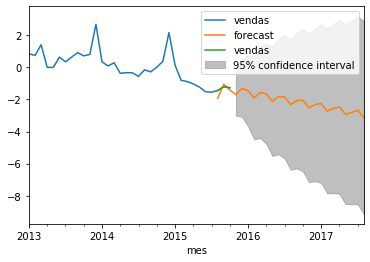

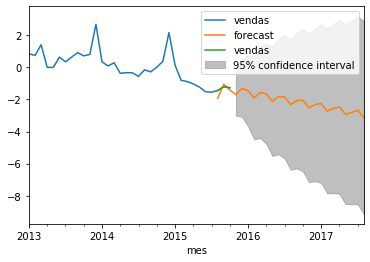

In [86]:
eixo = ori_data.plot()
modelo_train.plot_predict('2015-08-01','2017-08-01', ax = eixo, plot_insample = True) # Grafico de previsão de vendas